---
## 데이콘 신용카드 Missforest optuna SMOTE oversamplig, KNeightborsClassifier사용
### + random forest와 다른 oversampling도입하기 
---

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from missingpy import MissForest

In [10]:
from sklearn.metrics import *
from lightgbm import LGBMClassifier, Dataset
import optuna
from optuna.samplers import TPESampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, KFold
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train  = pd.read_csv('train.csv')
valid = pd.read_csv('val.csv')


---
#### 코드 잘 봤습니다. 혹시 feature 선택 기준에 대해서 공유해주실 수 있으실까요??

##### feature 선택은 validation dataset과 class의 상관관계를 확인하여 선정하였습니다
---

In [20]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28462 non-null  int64  
 1   V1      28462 non-null  float64
 2   V2      28462 non-null  float64
 3   V3      28462 non-null  float64
 4   V4      28462 non-null  float64
 5   V5      28462 non-null  float64
 6   V6      28462 non-null  float64
 7   V7      28462 non-null  float64
 8   V8      28462 non-null  float64
 9   V9      28462 non-null  float64
 10  V10     28462 non-null  float64
 11  V11     28462 non-null  float64
 12  V12     28462 non-null  float64
 13  V13     28462 non-null  float64
 14  V14     28462 non-null  float64
 15  V15     28462 non-null  float64
 16  V16     28462 non-null  float64
 17  V17     28462 non-null  float64
 18  V18     28462 non-null  float64
 19  V19     28462 non-null  float64
 20  V20     28462 non-null  float64
 21  V21     28462 non-null  float64
 22

<AxesSubplot: >

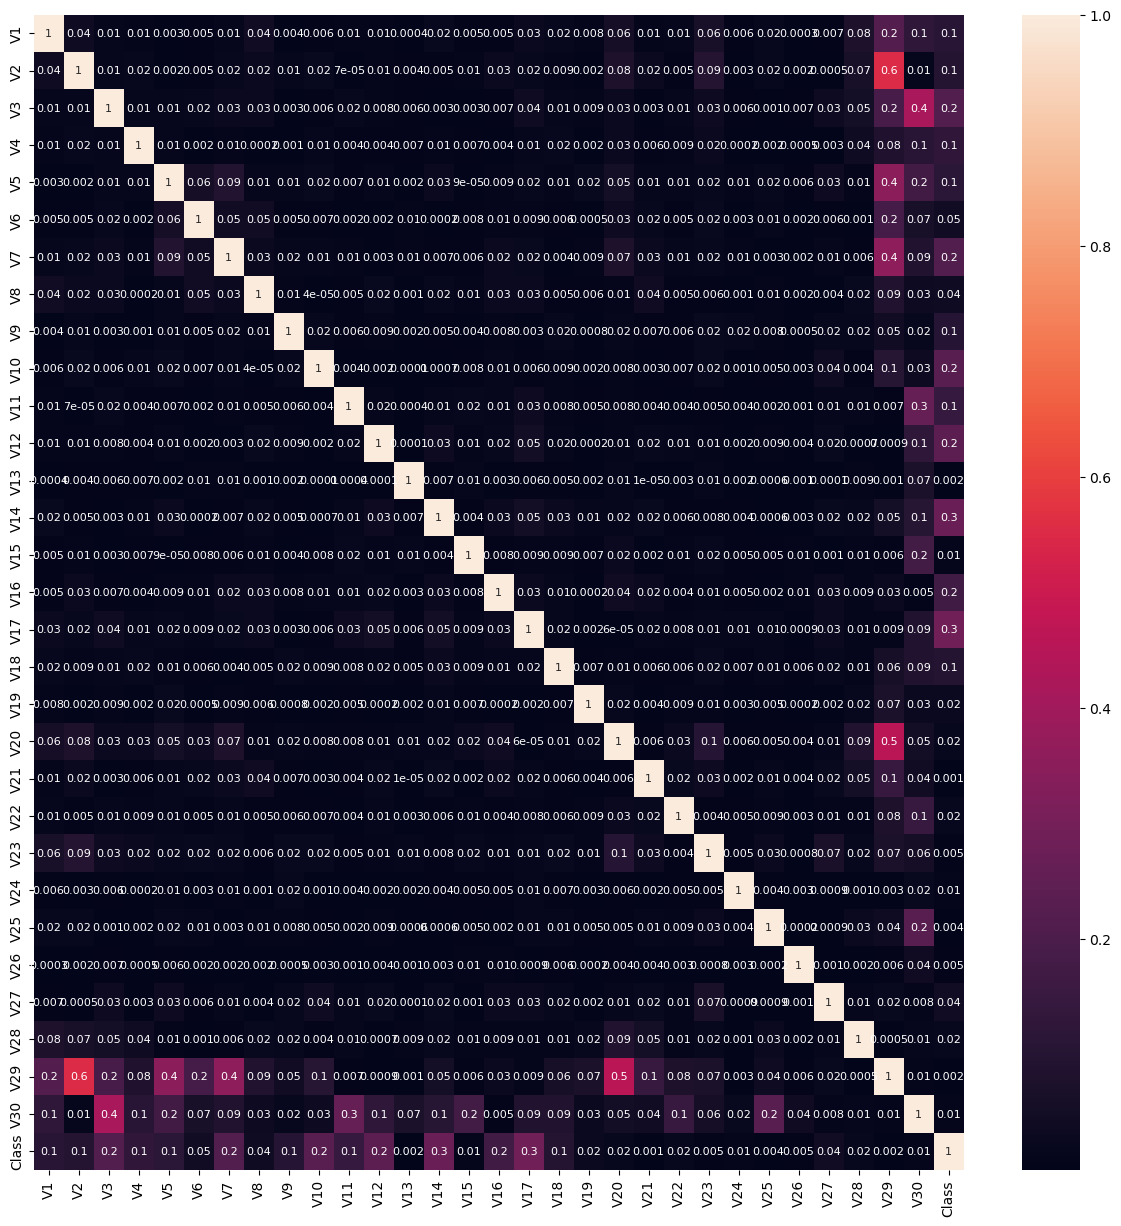

In [21]:
valid_cor = valid.drop(['ID'],axis=1).corr().abs()
plt.figure(figsize=(15,15))
#fmt는 표시되는 형식

sns.heatmap(valid_cor, annot = True, fmt = '.1g',  annot_kws={'fontsize':8})

##### 변수 선택에서 상관관계가 높은 col만을 추출한 것으로 확인됨.
##### 다중공선성이 의심되는 col의 경우(ex] v29)는 애초에 포함 X
##### 내가 사용할 상관관계가 0.2 이상 col
##### v3, v7, v10, v12, v14, 16, v17